In [ ]:
import pandas as pd

# Read the CSV files into DataFrames
df_democratic = pd.read_csv('/content/drive/MyDrive/PP24_16DemocraticResults.csv')
df_non_partisan = pd.read_csv('/content/drive/MyDrive/PP24_16Non-PartisanResults.csv')
df_republican = pd.read_csv('/content/drive/MyDrive/PP24_16RepublicanResults.csv')

# Now let's check for the column names in each dataset to ensure proper combination
df_democratic.columns, df_non_partisan.columns, df_republican.columns

# Since all datasets share similar column names, the concatenation should be correct.
# Concatenate the three DataFrames into combined_df
combined_df = pd.concat([df_democratic, df_non_partisan, df_republican], ignore_index=True)

# Re-displaying the combined data for clarity
combined_df.head()

,Office Name,Office District,Candidate Name,Party,Winner,Early Votes,Election Night Votes,Mail-In Ballot 1 Votes,Provisional Votes,Mail-In Ballot 2 Votes,Total Votes
0,President - Vice Pres,NaN,Joe Biden,DEM,Y,14100,42453,30830,4184,27972,119539
1,President - Vice Pres,NaN,Dean Phillips,DEM,NaN,152,600,277,53,256,1338
2,President - Vice Pres,NaN,Marianne Williamson,DEM,NaN,183,902,376,116,450,2027
3,President - Vice Pres,NaN,Uncommitted to any Presidential Candidate,DEM,NaN,1510,6120,2078,599,2677,12984
4,President - Vice Pres,04,Joe Biden,DEM,Y,621,1122,663,131,569,3106


In [ ]:
# prompt: Using dataframe combined_df: What is the total amount of votes?

# Calculate the total votes
total_votes = combined_df['Total Votes '].sum()

# Print the total votes
print(total_votes)


2526282


In [ ]:
# prompt: Using dataframe combined_df: who has the most votes?

# Find the candidate with the maximum total votes
candidate_with_most_votes = combined_df.loc[combined_df['Total Votes '].idxmax()]

# Print the candidate's name and total votes
print(f"The candidate with the most votes is: {candidate_with_most_votes['Candidate Name']} with {candidate_with_most_votes['Total Votes ']} votes.")


The candidate with the most votes is: Joe Biden with 119539 votes.


In [ ]:
# prompt: Using dataframe combined_df: what is the total votes sum by party?

# Group by party and calculate the sum of total votes
total_votes_by_party = combined_df.groupby('Party')['Total Votes '].sum()

# Display the result
print(total_votes_by_party)


Party
DEM    1832170
NON     406840
REP     287272
Name: Total Votes , dtype: int64


In [ ]:
# prompt: Using dataframe combined_df: generate a chart on how voters voted in the election using early votes, election night votes, mail-in ballot 1 votes, provisional votes, mail- in ballot votes 2 votes

# Import necessary libraries
import altair as alt

# Create a new DataFrame with only the voting types and total votes
vote_types = combined_df[['Early Votes', 'Election Night Votes', 'Mail-In Ballot 1 Votes', 'Provisional Votes', 'Mail-In Ballot 2 Votes']]

# Melt the DataFrame to have a column for vote type and a column for vote count
vote_types_melted = vote_types.melt()

# Create a bar chart using Altair
chart = alt.Chart(vote_types_melted).mark_bar().encode(
    x='variable',
    y='value',
).properties(
    title='Distribution of Votes by Voting Method'
)

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
print(combined_df)

               Office Name Office District  \
0    President - Vice Pres             NaN   
1    President - Vice Pres             NaN   
2    President - Vice Pres             NaN   
3    President - Vice Pres             NaN   
4    President - Vice Pres              04   
..                     ...             ...   
160         REP Alternates              08   
161         REP Alternates              08   
162         REP Alternates              08   
163         REP Alternates              08   
164         REP Alternates              08   

                                Candidate Name Party Winner  Early Votes  \
0                                    Joe Biden   DEM      Y        14100   
1                                Dean Phillips   DEM    NaN          152   
2                          Marianne Williamson   DEM    NaN          183   
3    Uncommitted to any Presidential Candidate   DEM    NaN         1510   
4                                    Joe Biden   DEM      Y        

In [ ]:
# Cleaning the data by removing rows with NaN or missing values
cleaned_df = combined_df.dropna()

# Display the cleaned DataFrame to show the result after removing NaN values
cleaned_df.head()

,Office Name,Office District,Candidate Name,Party,Winner,Early Votes,Election Night Votes,Mail-In Ballot 1 Votes,Provisional Votes,Mail-In Ballot 2 Votes,Total Votes
4,President - Vice Pres,04,Joe Biden,DEM,Y,621,1122,663,131,569,3106
8,President - Vice Pres,06,Joe Biden,DEM,Y,2202,6681,4321,539,4648,18391
12,President - Vice Pres,08,Joe Biden,DEM,Y,11277,34650,25846,3514,22755,98042
27,U.S. Congress,04,Glenn F. Ivey,DEM,Y,540,808,531,79,474,2432
36,U.S. Congress,06,April McClain Delaney,DEM,Y,983,2797,1640,213,2133,7766


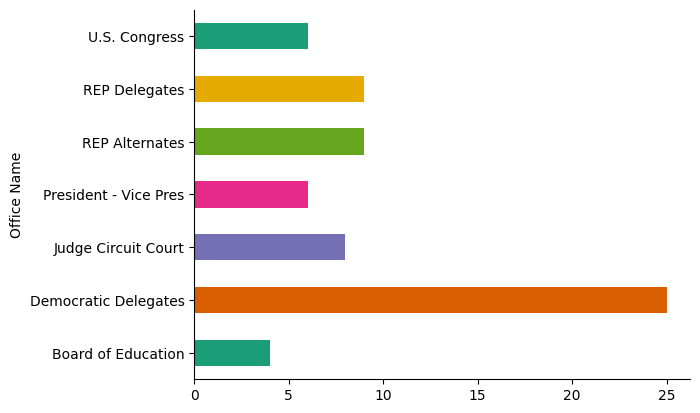

In [ ]:
# @title Office Name

from matplotlib import pyplot as plt
import seaborn as sns
cleaned_df.groupby('Office Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: Using dataframe cleaned_df: can you visualize total votes by party?

# Import the necessary library for visualization
import altair as alt

# Create a bar chart using Altair
chart = alt.Chart(cleaned_df).mark_bar().encode(
    x=alt.X('Party', sort='-y'),  # Sort bars by Total Votes in descending order
    y='sum(Total Votes )'  # Aggregate total votes for each party
)

# Display the chart
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# prompt: Using dataframe cleaned_df: can you visualize by candidate

import altair as alt

# Create a bar chart showing total votes by candidate
chart = alt.Chart(cleaned_df).mark_bar().encode(
    x='Candidate Name',
    y='Total Votes '
)

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# prompt: Using dataframe cleaned_df: show top 10 candidates with the most votes in bar chart

# Import necessary libraries
import altair as alt

# Create a bar chart showing the top 10 candidates with the most total votes
chart = alt.Chart(cleaned_df.sort_values('Total Votes ', ascending=False).head(10)).mark_bar().encode(
    x=alt.X('Candidate Name', sort='-y'),  # Sort by total votes in descending order
    y='Total Votes '
)
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# prompt: Using dataframe cleaned_df: show how many votes in total for Donald Trump

# Filter the dataframe to only include rows where the Candidate Name is Donald Trump.
trump_votes = cleaned_df[cleaned_df['Candidate Name'] == 'Donald J. Trump']

# Calculate the total number of votes for Donald Trump by summing the 'Total Votes ' column.
total_trump_votes = trump_votes['Total Votes '].sum()

# Print the total votes.
print(total_trump_votes)


15641


In [ ]:
# prompt: Using dataframe cleaned_df: show bidens total votes

# Filter the dataframe to only include rows where the candidate is Joe Biden
biden_votes = cleaned_df[cleaned_df['Candidate Name'] == 'Joe Biden']

# Calculate the sum of the total votes for Joe Biden
total_biden_votes = biden_votes['Total Votes '].sum()

# Print the total votes for Joe Biden
print(f"Joe Biden's total votes: {total_biden_votes}")


Joe Biden's total votes: 119539


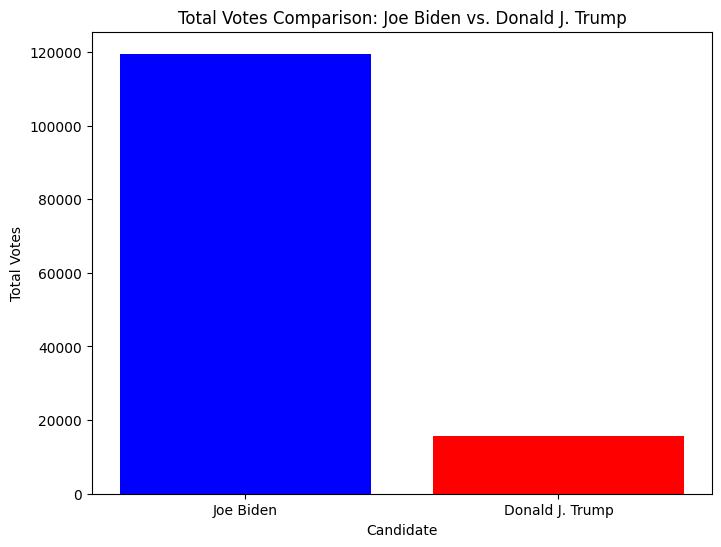

In [ ]:


# Now let's create the comparison chart
candidates = ['Joe Biden', 'Donald J. Trump']
votes = [total_biden_votes, total_trump_votes]

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(candidates, votes, color=['blue', 'red'])
plt.title('Total Votes Comparison: Joe Biden vs. Donald J. Trump')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.show()


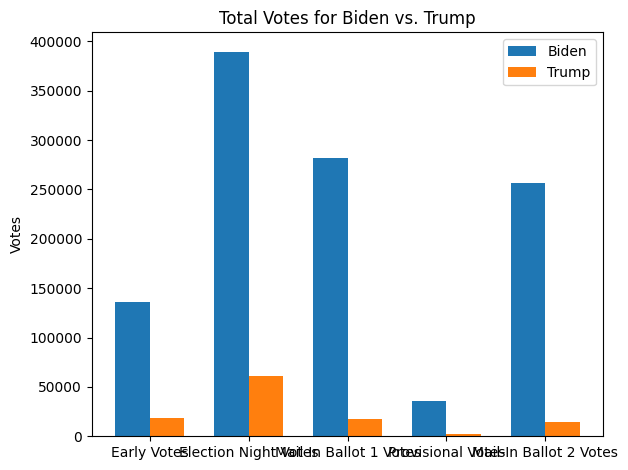

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Candidate Name' contains 'Biden' or 'Trump' to identify votes for each candidate
biden_votes = combined_df[combined_df['Candidate Name'].str.contains('Biden', case=False, na=False)]
trump_votes = combined_df[combined_df['Candidate Name'].str.contains('Trump', case=False, na=False)]

# Calculate the total votes for each candidate across different categories
biden_total_votes = biden_votes[['Early Votes', 'Election Night Votes', 'Mail-In Ballot 1 Votes', 'Provisional Votes', 'Mail-In Ballot 2 Votes']].sum()
trump_total_votes = trump_votes[['Early Votes', 'Election Night Votes', 'Mail-In Ballot 1 Votes', 'Provisional Votes', 'Mail-In Ballot 2 Votes']].sum()

# Create a bar graph to display the comparison
labels = ['Early Votes', 'Election Night Votes', 'Mail-In Ballot 1 Votes', 'Provisional Votes', 'Mail-In Ballot 2 Votes']
biden_data = biden_total_votes.values.tolist()
trump_data = trump_total_votes.values.tolist()

width = 0.35
x = range(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x, biden_data, width, label='Biden')
rects2 = ax.bar([i + width for i in x], trump_data, width, label='Trump')

ax.set_ylabel('Votes')
ax.set_title('Total Votes for Biden vs. Trump')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
# prompt: Using dataframe combined_df: do Office Name U.S Senator Angela Alsobrooks vs Larry Hogan

# Filter the dataframe to include only the rows where the Office Name is "U.S. Senator"
us_senator_df = combined_df[combined_df['Office Name'] == 'U.S. Senator']

# Filter the dataframe to include only the rows where the Candidate Name is "Angela Alsobrooks" or "Larry Hogan"
alsobrooks_hogan_df = us_senator_df[(us_senator_df['Candidate Name'] == 'Angela Alsobrooks') | (us_senator_df['Candidate Name'] == 'Larry Hogan')]

# Display the filtered dataframe
alsobrooks_hogan_df


,Office Name,Office District,Candidate Name,Party,Winner,Early Votes,Election Night Votes,Mail-In Ballot 1 Votes,Provisional Votes,Mail-In Ballot 2 Votes,Total Votes
16,U.S. Senator,NaN,Angela Alsobrooks,DEM,Y,8020,26806,13836,2792,15667,67121
111,U.S. Senator,NaN,Larry Hogan,REP,Y,2375,7868,3938,495,3081,17757


In [ ]:
# prompt: Using dataframe cleaned_df: show how many votes in total for Larry Hogan

# Filter the dataframe to only include rows where the Candidate Name is Larry Hogan.
hogan_votes = combined_df[combined_df['Candidate Name'] == 'Larry Hogan']

# Calculate the total number of votes for Larry Hogan by summing the 'Total Votes ' column.
total_hogan_votes = hogan_votes['Total Votes '].sum()

# Print the total votes.
print(total_hogan_votes)

17757


In [ ]:
# prompt: Using dataframe cleaned_df: show how many votes in total for Angela Alsobrooks

# Filter the dataframe to only include rows where the Candidate Name is Angela Alsobrooks.
alsobrooks_votes = combined_df[combined_df['Candidate Name'] == 'Angela Alsobrooks']

# Calculate the total number of votes for Larry Hogan by summing the 'Total Votes ' column.
total_alsobrooks_votes = alsobrooks_votes['Total Votes '].sum()

# Print the total votes.
print(total_alsobrooks_votes)

67121


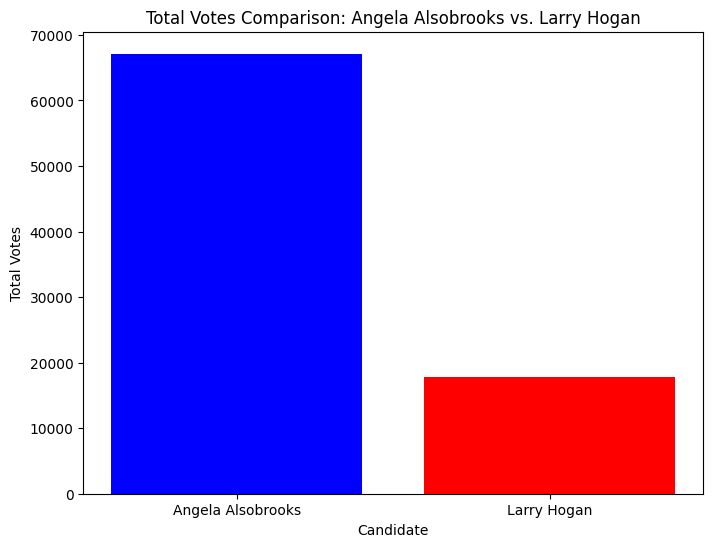

In [ ]:
# Now let's create the comparison chart
candidates = ['Angela Alsobrooks', 'Larry Hogan']
votes = [total_alsobrooks_votes, total_hogan_votes]

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(candidates, votes, color=['blue', 'red'])
plt.title('Total Votes Comparison: Angela Alsobrooks vs. Larry Hogan')
plt.xlabel('Candidate')
plt.ylabel('Total Votes')
plt.show()

In [ ]:
# prompt: Using dataframe combined_df: display how different parties voted early votes, election night votes, mail-in ballot 1 votes, provisional votes, mail-in ballot 2 votes in a graph

# Import necessary libraries
import altair as alt
import pandas as pd

# Melt the dataframe to long format for easier plotting
combined_df_melted = pd.melt(combined_df,
                              id_vars=['Party'],
                              value_vars=['Early Votes', 'Election Night Votes',
                                          'Mail-In Ballot 1 Votes',
                                          'Provisional Votes', 'Mail-In Ballot 2 Votes'],
                              var_name='Vote Type',
                              value_name='Total Votes')

# Create the chart
chart = alt.Chart(combined_df_melted).mark_bar().encode(
    x=alt.X('Party:N', title='Party'),
    y=alt.Y('Total Votes:Q', title='Total Votes'),
    color='Vote Type:N',
    column=alt.Column('Vote Type:N', title='Vote Type')
).properties(
    title='Total Votes by Party and Vote Type'
)

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)